# KNN Classification Problem 2

Prepare a model for glass classification using KNN.

### Data Description:
- RI : refractive index

- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

- Mg: Magnesium

- AI: Aluminum

- Si: Silicon

- K:Potassium

- Ca: Calcium

- Ba: Barium

- Fe: Iron

### Type: Type of glass: (class attribute)
- 1 --> building_windows_float_processed
- 2 --> building_windows_non_float_processed
- 3 --> vehicle_windows_float_processed
- 4 --> vehicle_windows_non_float_processed (none in this database)
- 5 --> containers
- 6 --> tableware
- 7 --> headlamps

In [18]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [20]:
data.info() #no nulll values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [21]:
data.describe() # data needs to be standardized since its on a different scale

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: xlabel='Type', ylabel='count'>

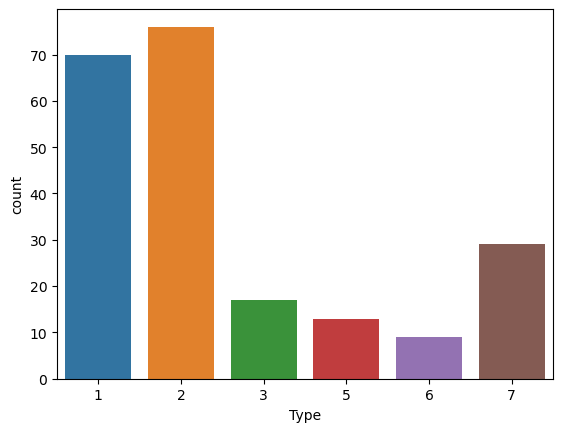

In [22]:
sns.countplot(data=data,x='Type')
#Value counts for each glass category

In [23]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Visualization EDA

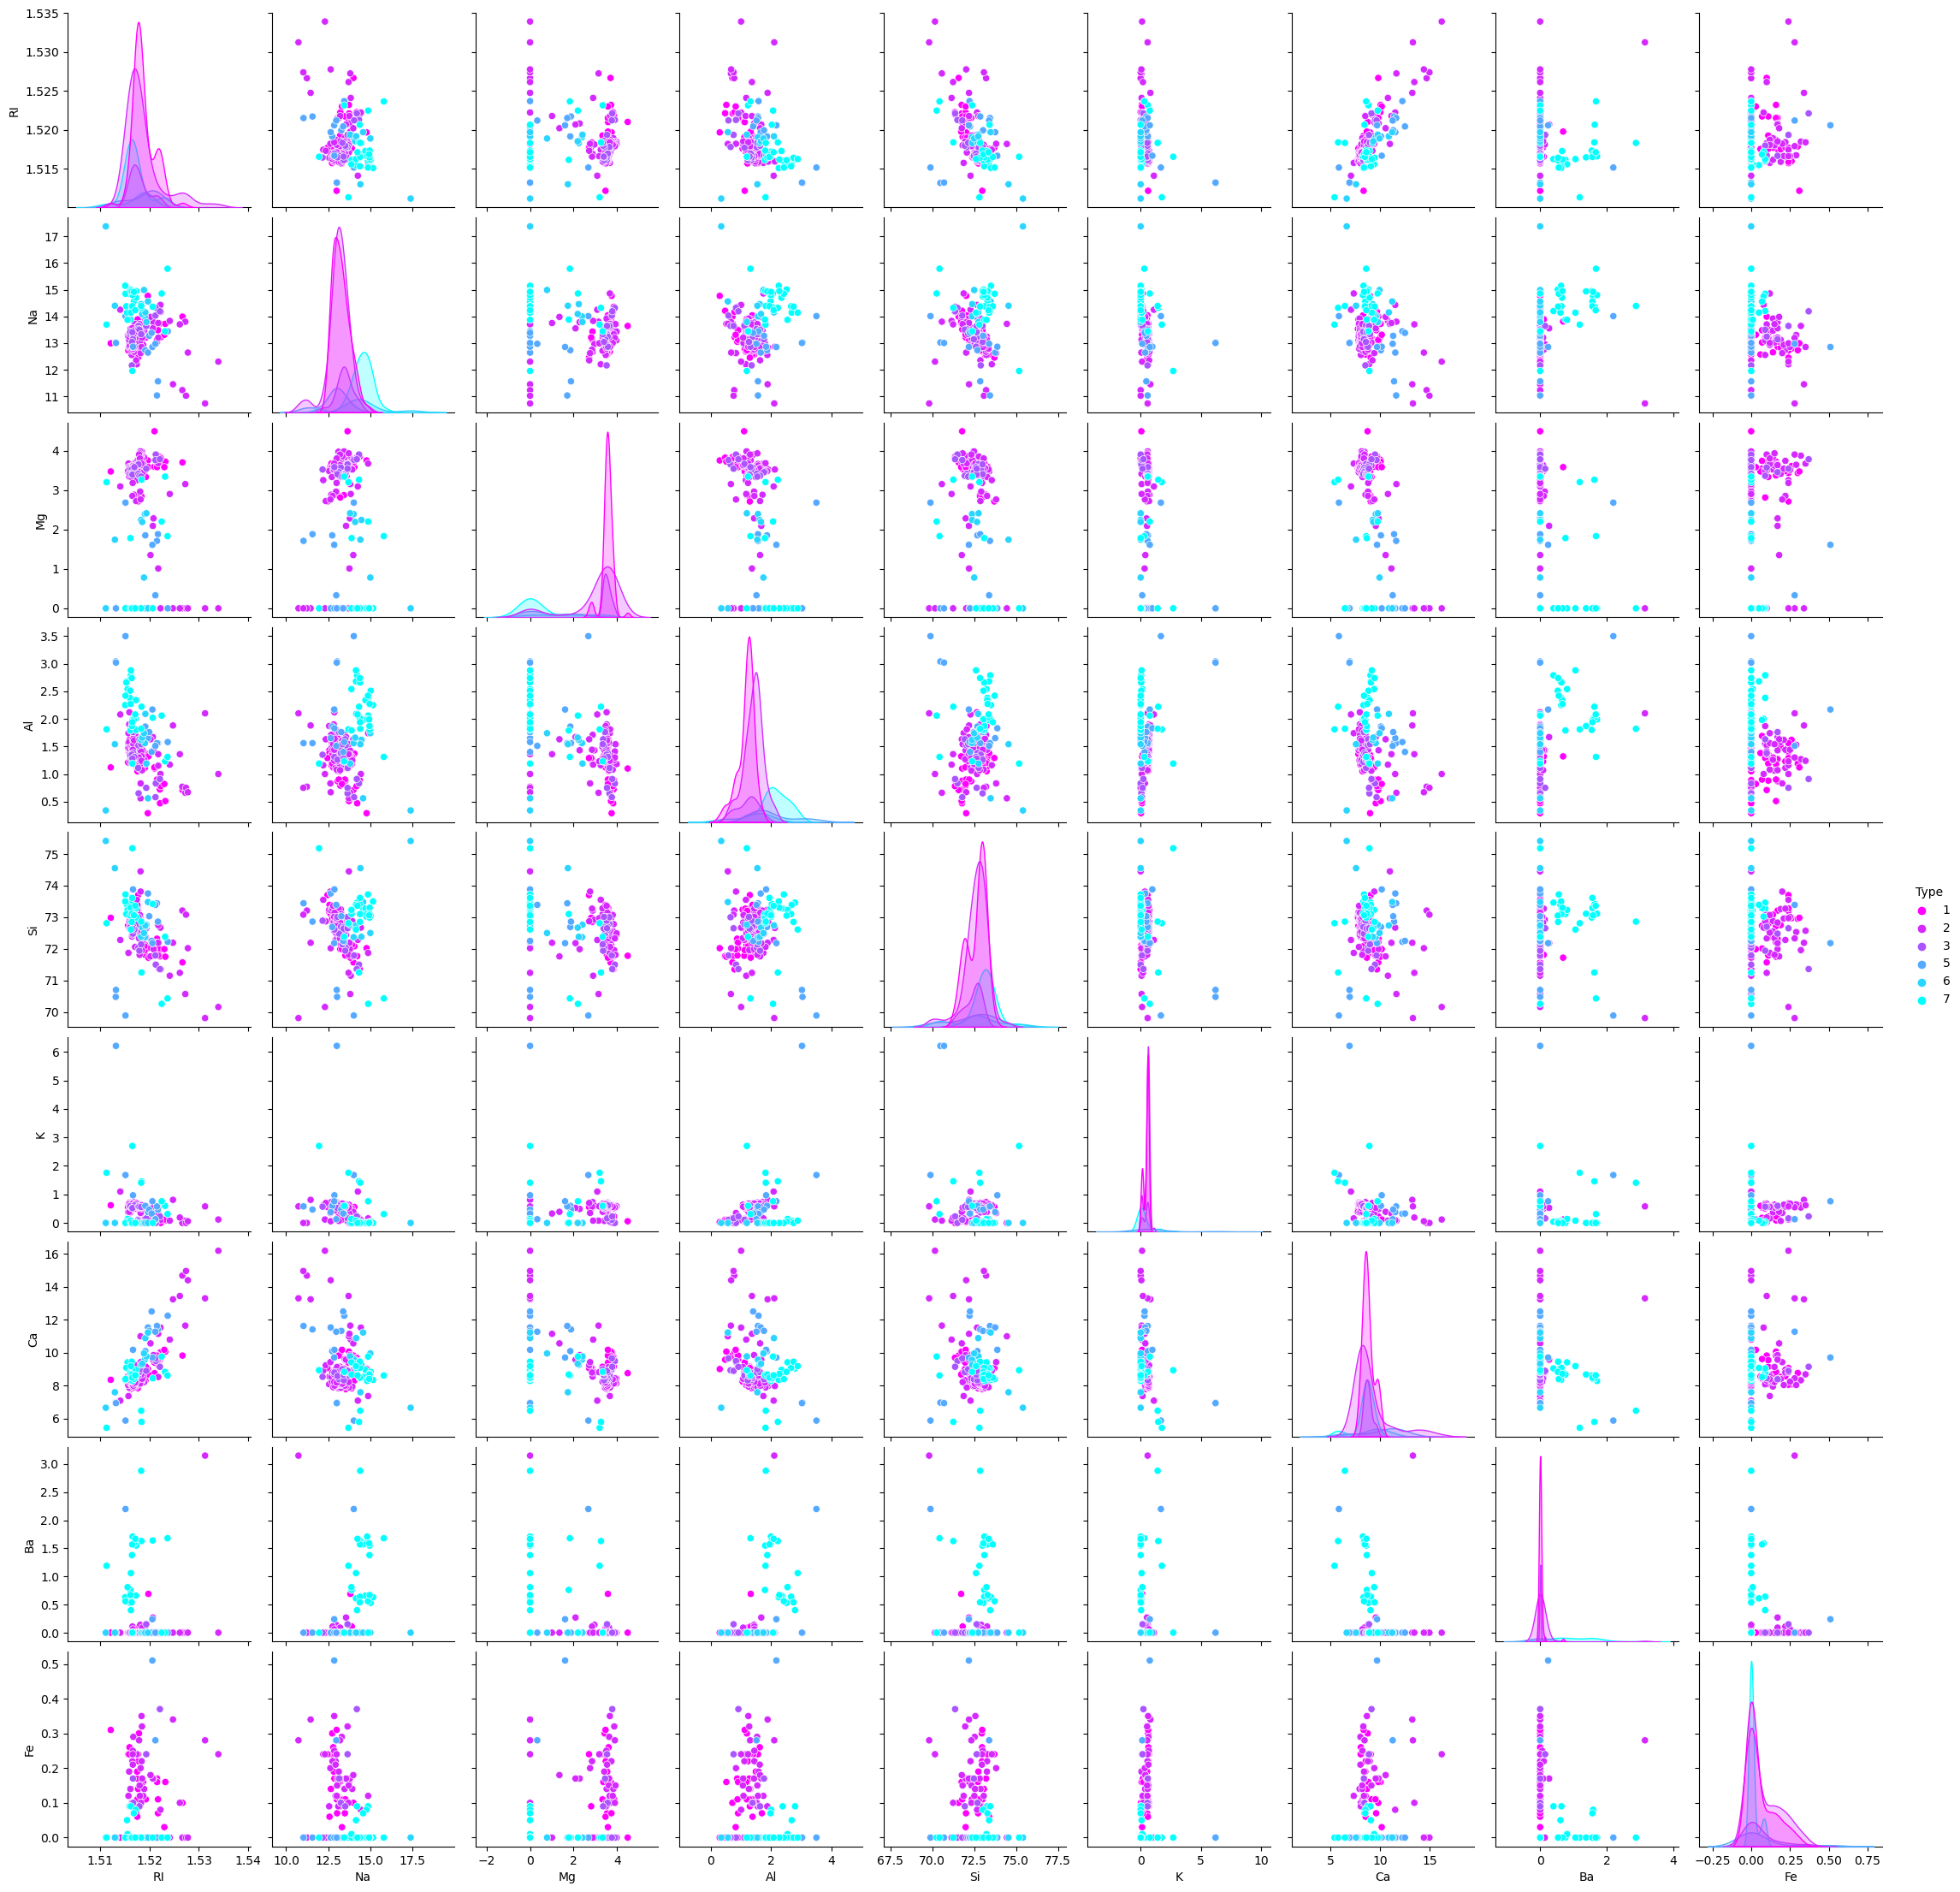

In [24]:
sns.pairplot(data ,hue='Type',palette='cool_r')

## Feature Engineering

- All the features can be considered for model building.
- Data needs to be split for training and splitting
- No categorical variables, therefore there is no requirement for label encoding or dummies.

In [25]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN Classifier

In [27]:
model1 = KNeighborsClassifier(n_neighbors=1)

In [28]:
model1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
import sklearn

### Model Evaluation

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def confusion_matri(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()

In [31]:
from sklearn.metrics import classification_report

In [37]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    cf_matrix = confusion_matrix(y_test,preds)
    confusion_matri(cf_matrix)

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        19
           2       0.84      0.70      0.76        23
           3       0.60      0.75      0.67         4
           5       0.83      0.83      0.83         6
           6       0.33      0.67      0.44         3
           7       0.90      0.90      0.90        10

    accuracy                           0.77        65
   macro avg       0.72      0.77      0.73        65
weighted avg       0.80      0.77      0.78        65



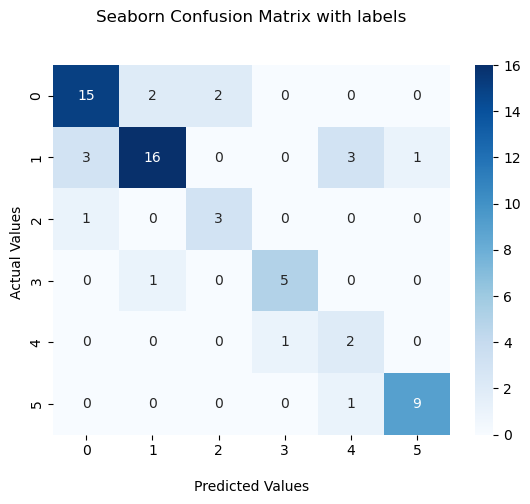

In [38]:
report(model1)

### K-fold validation

In [39]:
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model1, X, y, cv=kfold)
print(results.mean()) 

0.7145021645021645


Decent value but can be improved

### Finding Optimal Value of K

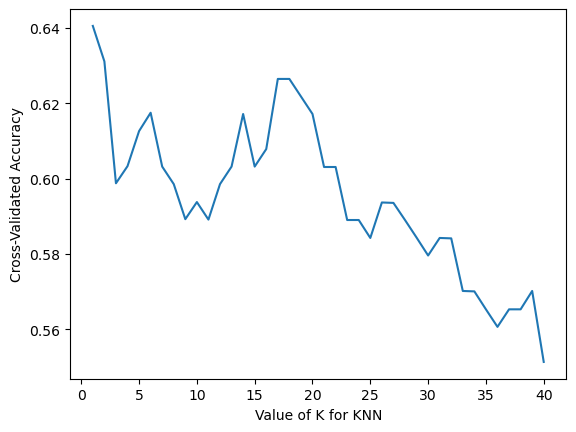

In [40]:
k_scores = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(range(1,41), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

 Optimal value is 1 or 3 or around 15 or 17

              precision    recall  f1-score   support

           1       0.53      0.89      0.67        19
           2       0.58      0.48      0.52        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.00      0.00      0.00         3
           7       0.73      0.80      0.76        10

    accuracy                           0.58        65
   macro avg       0.47      0.42      0.41        65
weighted avg       0.56      0.58      0.54        65



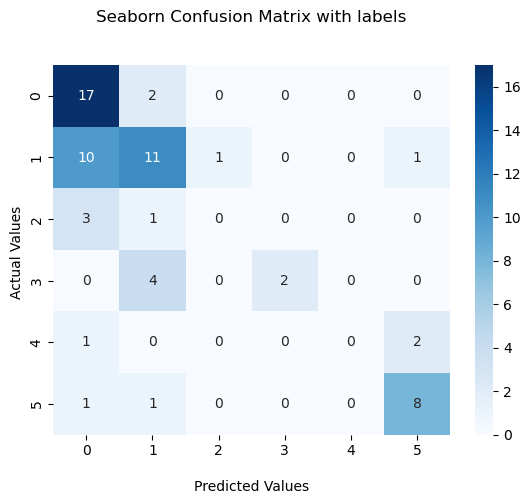

In [41]:
model2 = KNeighborsClassifier(n_neighbors=15)
model2.fit(X_train,y_train)
report(model2)


Value is not good enough

model3 = KNeighborsClassifier(n_neighbors=17)
model3.fit(X_train,y_train)
report(model3)

              precision    recall  f1-score   support

           1       0.57      0.68      0.62        19
           2       0.71      0.65      0.68        23
           3       0.40      0.50      0.44         4
           5       1.00      0.50      0.67         6
           6       0.25      0.33      0.29         3
           7       0.89      0.80      0.84        10

    accuracy                           0.65        65
   macro avg       0.64      0.58      0.59        65
weighted avg       0.68      0.65      0.65        65



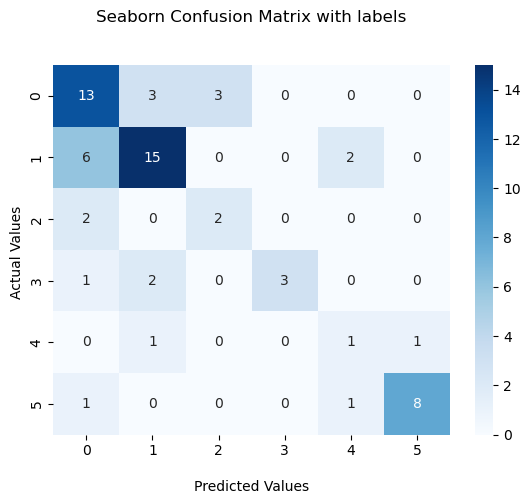

In [43]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
report(model4) 

 Better but not good enough

## Building the Final Model

In [44]:
model_fnl = KNeighborsClassifier(n_neighbors=1)

In [45]:
model_fnl.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        19
           2       0.84      0.70      0.76        23
           3       0.60      0.75      0.67         4
           5       0.83      0.83      0.83         6
           6       0.33      0.67      0.44         3
           7       0.90      0.90      0.90        10

    accuracy                           0.77        65
   macro avg       0.72      0.77      0.73        65
weighted avg       0.80      0.77      0.78        65



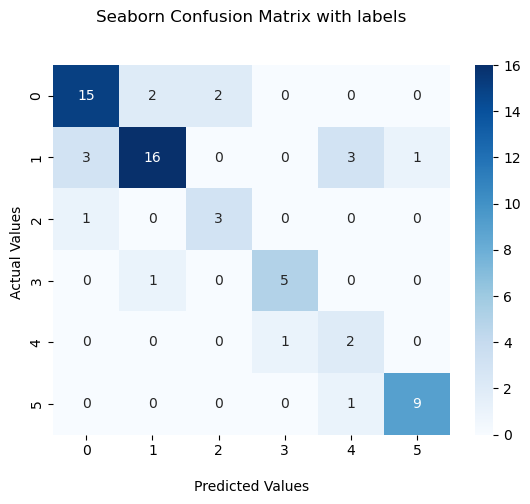

In [46]:
report(model_fnl) #K=1 gives the most accurate results compared to 3 and 15

K=1 gives the most accurate results compared to 3 and 15

- K=1 gave the best results of all the values.
- Training data is biased due to which some categories have good precision and recall scores.
- The final model had a decent score and would perfom well with unseen data as there is a balance between Bias and Variance.